<a href="https://colab.research.google.com/github/Krishal555/Concepts-of-AI-Workshop0/blob/main/Worksheet_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Worksheet - 4
Krishal Maharjan
#Concepts Of AI

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt
import numpy as np

#To - Do Exercise:
For the provided dataset:
• diabetes.csv

#Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.

4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [2]:
# Problem - 1: Perform a classification task with knn from scratch.

# 1. Load the Dataset:
# • Read the dataset into a pandas DataFrame.
dataset_path = "/content/drive/MyDrive/Machine-Learning_Assignment1/diabetes.csv"
df = pd.read_csv(dataset_path)

#displaying
print("First few rows of the dataset:")
display(df.head())

print("\nData Types:")
display(df.dtypes)

print("\nMissing Values:")
display(df.isnull().sum())

print("\nSummary Statistics:")
display(df.describe())

First few rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Data Types:


,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64



Missing Values:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0



Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# No.2 Missing values
print("Missing Values Before Handling:")
display(df.isnull().sum())

df_cleaned = df.dropna()

print("\nMissing Values After Handling:")
display(df_cleaned.isnull().sum())

Missing Values Before Handling:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0



Missing Values After Handling:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
# No.3 Feature Engineering:
X = df_cleaned.drop(columns=['Outcome'])
y = df_cleaned['Outcome']

split_index = int(0.7 * len(X))

shuffled_indices = np.random.permutation(len(X))
X = X.iloc[shuffled_indices]
y = y.iloc[shuffled_indices]

# Split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Display the resulting splits
print("Shape of Training Features (X_train):", X_train.shape)
print("Shape of Training Target (y_train):", y_train.shape)
print("Shape of Testing Features (X_test):", X_test.shape)
print("Shape of Testing Target (y_test):", y_test.shape)

Shape of Training Features (X_train): (537, 8)
Shape of Training Target (y_train): (537,)
Shape of Testing Features (X_test): (231, 8)
Shape of Testing Target (y_test): (231,)


In [8]:
# No.4 Implement KNN:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

#  Predicting the class for a single query.
def predict_single(query_point, X_train, y_train, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(query_point, X_train[i])
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    k_neighbors = [neighbor[1] for neighbor in distances[:k]]

    # Return the most common class
    return max(set(k_neighbors), key=k_neighbors.count)

# – Predicting classes for all test samples.
def predict(X_test, X_train, y_train, k):
    predictions = []
    for query_point in X_test:
        pred = predict_single(query_point, X_train, y_train, k)
        predictions.append(pred)
    return np.array(predictions)

# • Evaluate the performance using accuracy.
def evaluate_accuracy(y_test, y_pred):
    return np.mean(y_test == y_pred)

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

k = 3
y_pred = predict(X_test_np, X_train_np, y_train_np, k)
accuracy = evaluate_accuracy(y_test_np, y_pred)

print(f"Accuracy of KNN classifier with k={k}: {accuracy:.2f}")

Accuracy of KNN classifier with k=3: 0.70


#Problem - 2 - Experimentation:

1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.

2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [9]:
# No.1 Repeat the classification
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_pred_scaled = predict(X_test_scaled, X_train_scaled, y_train_np, k)

accuracy_scaled = evaluate_accuracy(y_test_np, y_pred_scaled)

print(f"Accuracy of KNN classifier with k={k} on scaled data: {accuracy_scaled:.2f}")

Accuracy of KNN classifier with k=3 on scaled data: 0.78


In [ ]:
# No.2 Comparative Analysis: Compare the Results
y_pred_original = predict(X_test_np, X_train_np, y_train_np, k)
accuracy_original = evaluate_accuracy(y_test_np, y_pred_original)

print(f"Accuracy of KNN classifier with k={k} on original data: {accuracy_original:.2f}")
print(f"Accuracy of KNN classifier with k={k} on scaled data: {accuracy_scaled:.2f}")

#Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.

2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.

3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

In [10]:
# Problem - 3 - Experimentation with k:
k_values = list(range(1, 16))
accuracy_original = []
accuracy_scaled = []
time_original = []
time_scaled = []

for k in k_values:
    # Time for original data
    start_time = time.time()
    y_pred_original = predict(X_test_np, X_train_np, y_train_np, k)
    time_taken_original = time.time() - start_time
    accuracy_original.append(evaluate_accuracy(y_test_np, y_pred_original))
    time_original.append(time_taken_original)

    # Time for scaled data
    start_time = time.time()
    y_pred_scaled = predict(X_test_scaled, X_train_scaled, y_train_np, k)
    time_taken_scaled = time.time() - start_time
    accuracy_scaled.append(evaluate_accuracy(y_test_np, y_pred_scaled))
    time_scaled.append(time_taken_scaled)

    # Print progress every 5 steps to check status
    if k % 5 == 0:
        print(f"Completed k={k}...")

print(f"Length of k_values: {len(k_values)}")
print(f"Length of time_scaled: {len(time_scaled)}")

print("k\tAccuracy (Original)\tTime (Original)\tAccuracy (Scaled)\tTime (Scaled)")
for k, acc_orig, time_orig, acc_scaled, time_scaled in zip(k_values, accuracy_original, time_original, accuracy_scaled, time_scaled):
    print(f"{k}\t{acc_orig:.4f}\t\t{time_orig:.4f}\t\t{acc_scaled:.4f}\t\t{time_scaled:.4f}")

Completed k=5...
Completed k=10...
Completed k=15...
Length of k_values: 15
Length of time_scaled: 15
k	Accuracy (Original)	Time (Original)	Accuracy (Scaled)	Time (Scaled)
1	0.6667		0.9109		0.7403		0.9044
2	0.7359		0.9326		0.7359		0.8833
3	0.6970		1.4724		0.7792		3.2051
4	0.7706		2.2555		0.7532		1.8275
5	0.7446		1.0583		0.7706		1.0373
6	0.7576		1.7252		0.7489		1.8460
7	0.7489		1.9362		0.7749		1.5748
8	0.7403		1.7208		0.7316		1.3756
9	0.7273		0.8967		0.7576		0.9178
10	0.7359		0.8804		0.7446		0.9028
11	0.7186		0.9215		0.7316		0.9431
12	0.7186		0.8948		0.7273		0.8640
13	0.7273		0.8841		0.7229		0.9053
14	0.7229		1.0822		0.7273		1.6885
15	0.7273		1.6789		0.7273		1.3097


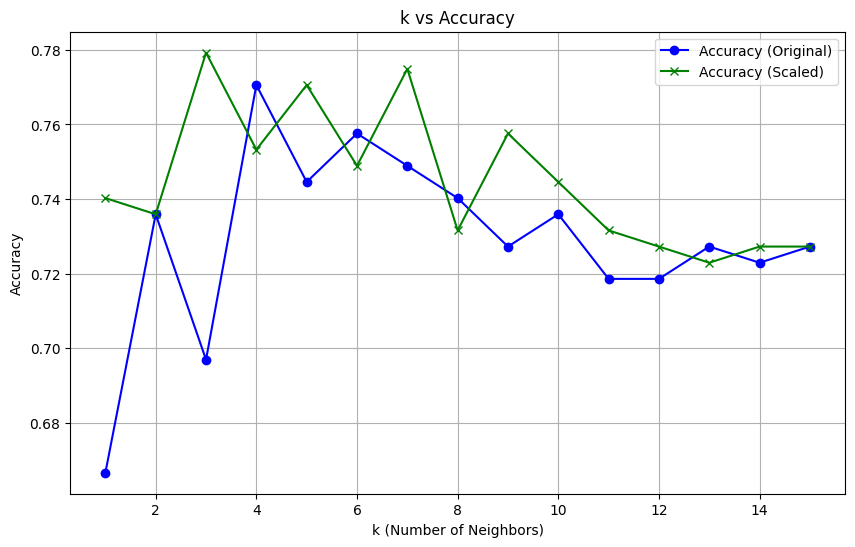

In [11]:
# 2. Visualize the Results:
# • Plot the following graphs:
# – k vs. Accuracy for original and scaled datasets.
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_original, label="Accuracy (Original)", color='blue', marker='o')
plt.plot(k_values, accuracy_scaled, label="Accuracy (Scaled)", color='green', marker='x')
plt.title("k vs Accuracy")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

#Problem - 4 - Additional Questions {Optional - But Highly Recommended}:

• Discuss the challenges of using KNN for large datasets and high-dimensional data.
• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).

### Challenges of using KNN for large datasets and high-dimensional data ###
1. High computational cost due to the need to calculate distances for all points in the dataset for every query.
2. The curse of dimensionality makes distance metrics less meaningful in high-dimensional spaces.
3. Memory consumption increases significantly with large datasets, as KNN requires storing the entire dataset.
4. Sensitivity to noisy data and irrelevant features, which can skew predictions.

### Strategies to improve the efficiency of KNN ###
1. **Approximate Nearest Neighbors (ANN):**
   - Use algorithms like Locality Sensitive Hashing (LSH) or KD-Trees to approximate neighbor search efficiently.
2. **Dimensionality Reduction:**
   - Apply techniques such as Principal Component Analysis (PCA) or t-SNE to reduce the feature space.
3. **Efficient Data Structures:**
   - Use KD-Trees or Ball Trees for faster search in lower dimensions.
4. **Sampling:**
   - Use a representative sample of the dataset for predictions instead of the entire dataset.
5. **Feature Selection:**
   - Remove irrelevant or noisy features to improve distance computations.
6. **Distributed Computing:**
   - Distribute computations across multiple processors or systems to handle large datasets.
7. **Weighted KNN:**
   - Assign weights to neighbors based on their distance to the query point to reduce sensitivity to irrelevant points.